# Exploratory data analysis (EDA)

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns

In [2]:
path = Path.home() / 'OneDrive - Seagroup/mkt/organic_predict/mkt_a1_organic.ftr'
df = pd.read_feather(path)

df.head()

,grass_week,grass_month,grass_date,date_type,Organic,Seller Ads,CRM,GG SEO,Offline,Affiliate,...,MiniSpike,spike,spike_date,days_dif_spike,mini_spike_date,days_dif_mini_spike,Tiktok_monthly_a1_minus_m2,Tiktok_monthly_a30_minus_m2,Lazada_monthly_a1_minus_m2,Lazada_monthly_a30_minus_m2
0,2020-12-28,2021-01-01,2021-01-01,BAU,2088631.0,62515.0,376752.0,173305.0,8188.0,13761.0,...,0,0,27.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-28,2021-01-01,2021-01-02,BAU,2122025.0,52141.0,335163.0,174069.0,8188.0,13841.0,...,0,0,27.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-28,2021-01-01,2021-01-03,BAU,2202061.0,44270.0,322492.0,174674.0,8188.0,15547.0,...,0,0,27.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,2021-01-01,2021-01-04,BAU,2276030.0,40557.0,352532.0,185140.0,8188.0,18454.0,...,0,0,27.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04,2021-01-01,2021-01-05,BAU,2350501.0,33928.0,379686.0,186427.0,8188.0,18746.0,...,0,0,27.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Summerize Data

In [3]:
df.shape

(1458, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   grass_week                   1458 non-null   object        
 1   grass_month                  1458 non-null   object        
 2   grass_date                   1458 non-null   datetime64[ns]
 3   date_type                    1458 non-null   object        
 4   Organic                      1419 non-null   float64       
 5   Seller Ads                   1419 non-null   float64       
 6   CRM                          1419 non-null   float64       
 7   GG SEO                       1419 non-null   float64       
 8   Offline                      1449 non-null   float64       
 9   Affiliate                    1449 non-null   float64       
 10  Paid Install                 1449 non-null   float64       
 11  Retargeting                  1449 non-null 

In [5]:
col = ['Organic', 'Seller Ads']
df[col].describe()

,Organic,Seller Ads
count,1.419000e+03,1419.000000
mean,2.954967e+06,185376.895701
std,4.943013e+05,94242.499342
min,1.219870e+06,15211.000000
25%,2.603987e+06,109898.000000
50%,3.057306e+06,183547.000000
75%,3.291284e+06,237657.000000
max,4.298470e+06,564963.000000


In [6]:
df[col].describe(percentiles=[.1, .4, .5, .9])

,Organic,Seller Ads
count,1.419000e+03,1419.000000
mean,2.954967e+06,185376.895701
std,4.943013e+05,94242.499342
min,1.219870e+06,15211.000000
10%,2.170991e+06,67393.000000
40%,2.988405e+06,161802.200000
50%,3.057306e+06,183547.000000
90%,3.516546e+06,305951.000000
max,4.298470e+06,564963.000000


In [7]:
df['Organic'].quantile([.5, .7])

0.5    3057306.0
0.7    3232830.6
Name: Organic, dtype: float64

<AxesSubplot:ylabel='Frequency'>

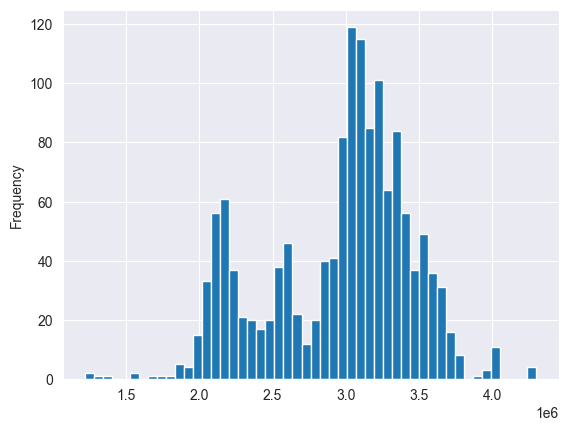

In [8]:
df['Organic'].plot.hist(bins=50)

<AxesSubplot:xlabel='Organic', ylabel='Count'>

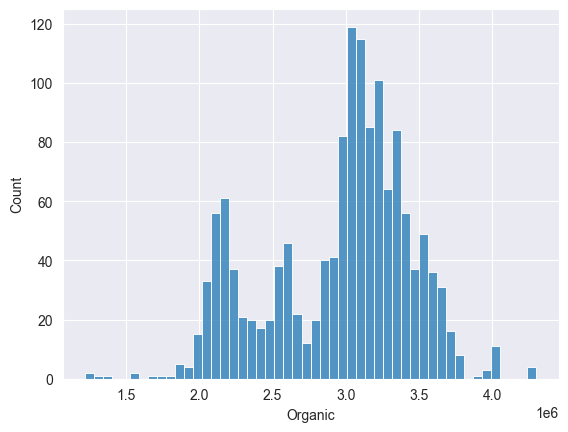

In [9]:
sns.histplot(data=df, x='Organic', bins=50)

<AxesSubplot:xlabel='Organic'>

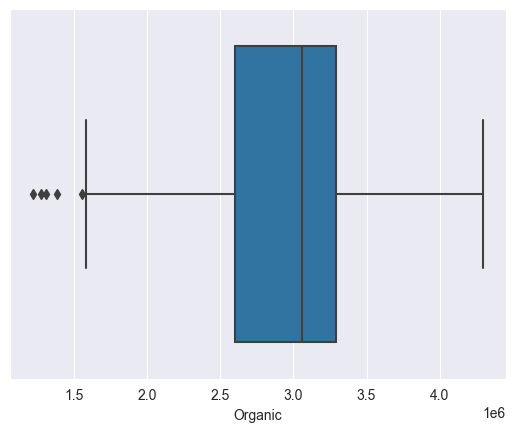

In [10]:
sns.boxplot(data=df, x='Organic')

## 2. Select Data

In [11]:
# select * from table where grass_date = '2022-01-01'
df.query('grass_date == "2022-01-01"')

,grass_week,grass_month,grass_date,date_type,Organic,Seller Ads,CRM,GG SEO,Offline,Affiliate,...,MiniSpike,spike,spike_date,days_dif_spike,mini_spike_date,days_dif_mini_spike,Tiktok_monthly_a1_minus_m2,Tiktok_monthly_a30_minus_m2,Lazada_monthly_a1_minus_m2,Lazada_monthly_a30_minus_m2
701,2021-12-27,2022-01-01,2022-01-01,Mini-Spike,3323893.0,167849.0,449005.0,356471.0,15709.0,146445.0,...,0,0,15.0,14.0,1.0,0.0,15773232.0,29374307.0,5304120.0,19207951.0


In [12]:
# select grass_date, Organic, date_type from table where grass_date = '2022-01-01'
df.query('grass_date == "2022-01-01"')[['grass_date', 'Organic', 'date_type']]

,grass_date,Organic,date_type
701,2022-01-01,3323893.0,Mini-Spike


## 3. Group Data

In [13]:
# select grass_month, mean(Orgranic) Orgranic  from table group by grass_month
df.groupby(['grass_month'])['Organic'].mean()  # sum, count, median, quantile, std

grass_month
2021-01-01    2.188944e+06
2021-02-01    1.969334e+06
2021-03-01    2.164323e+06
2021-04-01    2.088881e+06
2021-05-01    2.123221e+06
2021-06-01    2.364899e+06
2021-07-01    2.573637e+06
2021-08-01    2.583973e+06
2021-09-01    2.853039e+06
2021-10-01    3.033914e+06
2021-11-01    3.052822e+06
2021-12-01    3.183346e+06
2022-01-01    3.198339e+06
2022-02-01    3.141014e+06
2022-03-01    3.148796e+06
2022-04-01    3.259103e+06
2022-05-01    3.121483e+06
2022-06-01    3.109628e+06
2022-07-01    3.148052e+06
2022-08-01    3.397266e+06
2022-09-01    3.519287e+06
2022-10-01    3.400951e+06
2022-11-01    3.379493e+06
2022-12-01    3.593651e+06
2023-02-01    3.591108e+06
2023-03-01    3.558119e+06
2023-04-01             NaN
Name: Organic, dtype: float64

In [14]:
# select grass_month, grass_week, mean(Orgranic) Orgranic  from table group by grass_month, grass_week
df.groupby(['grass_week', 'grass_month'])['Organic'].mean()  # sum, count, median, quantile, std

grass_week  grass_month
2020-12-28  2021-01-01     2.137572e+06
2021-01-04  2021-01-01     2.251539e+06
2021-01-11  2021-01-01     2.187163e+06
2021-01-18  2021-01-01     2.151942e+06
2021-01-25  2021-01-01     2.187151e+06
                               ...     
2023-03-27  2023-04-01              NaN
2023-04-03  2023-04-01              NaN
2023-04-10  2023-04-01              NaN
2023-04-17  2023-04-01              NaN
2023-04-24  2023-04-01              NaN
Name: Organic, Length: 135, dtype: float64

## 4. Reshape Data

In [15]:
# select * from table order by grass_date asc
df.sort_values('grass_date', ascending=True)

,grass_week,grass_month,grass_date,date_type,Organic,Seller Ads,CRM,GG SEO,Offline,Affiliate,...,MiniSpike,spike,spike_date,days_dif_spike,mini_spike_date,days_dif_mini_spike,Tiktok_monthly_a1_minus_m2,Tiktok_monthly_a30_minus_m2,Lazada_monthly_a1_minus_m2,Lazada_monthly_a30_minus_m2
0,2020-12-28,2021-01-01,2021-01-01,BAU,2088631.0,62515.0,376752.0,173305.0,8188.0,13761.0,...,0,0,27.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-28,2021-01-01,2021-01-02,BAU,2122025.0,52141.0,335163.0,174069.0,8188.0,13841.0,...,0,0,27.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-28,2021-01-01,2021-01-03,BAU,2202061.0,44270.0,322492.0,174674.0,8188.0,15547.0,...,0,0,27.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,2021-01-01,2021-01-04,BAU,2276030.0,40557.0,352532.0,185140.0,8188.0,18454.0,...,0,0,27.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04,2021-01-01,2021-01-05,BAU,2350501.0,33928.0,379686.0,186427.0,8188.0,18746.0,...,0,0,27.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2023-04-24,2023-04-01,2023-04-26,BAU,NaN,NaN,NaN,NaN,5000.0,56645.0,...,0,0,4.0,-22.0,NaN,NaN,38269455.0,54070761.0,7287006.0,20317257.0
1454,2023-04-24,2023-04-01,2023-04-27,BAU,NaN,NaN,NaN,NaN,5000.0,49155.0,...,0,0,4.0,-23.0,NaN,NaN,38269455.0,54070761.0,7287006.0,20317257.0
1455,2023-04-24,2023-04-01,2023-04-28,BAU,NaN,NaN,NaN,NaN,5000.0,48424.0,...,0,0,4.0,-24.0,NaN,NaN,38269455.0,54070761.0,7287006.0,20317257.0
1456,2023-04-24,2023-04-01,2023-04-29,BAU,NaN,NaN,NaN,NaN,5000.0,45803.0,...,0,0,4.0,-25.0,NaN,NaN,38269455.0,54070761.0,7287006.0,20317257.0


In [16]:
# drop columns
tmp = df[['grass_date', 'Organic']].copy()
tmp.drop(columns=['grass_date'], inplace=True)
tmp

,Organic
0,2088631.0
1,2122025.0
2,2202061.0
3,2276030.0
4,2350501.0
...,...
1453,NaN
1454,NaN
1455,NaN
1456,NaN


In [17]:
# rename columns
tmp = df[['grass_date', 'Organic']].copy()
tmp.rename(columns={'grass_date': 'date'}, inplace=True)
tmp

,date,Organic
0,2021-01-01,2088631.0
1,2021-01-02,2122025.0
2,2021-01-03,2202061.0
3,2021-01-04,2276030.0
4,2021-01-05,2350501.0
...,...,...
1453,2023-04-26,NaN
1454,2023-04-27,NaN
1455,2023-04-28,NaN
1456,2023-04-29,NaN


In [18]:
col = ['grass_date', 'date_type', 'Organic']
df_spike = df.query('date_type == "Spike"')[col].head().copy()
df_minispike = df.query('date_type == "Mini-Spike"')[col].head().copy()

In [19]:
df_spike.head()

,grass_date,date_type,Organic
26,2021-01-27,Spike,2423718.0
63,2021-03-03,Spike,2469521.0
64,2021-03-03,Spike,2469521.0
127,2021-04-04,Spike,2701244.0
128,2021-04-04,Spike,2701244.0


In [20]:
df_minispike.head()

,grass_date,date_type,Organic
32,2021-02-02,Mini-Spike,2187496.0
73,2021-03-08,Mini-Spike,2074939.0
74,2021-03-08,Mini-Spike,2074939.0
111,2021-03-27,Mini-Spike,2259778.0
112,2021-03-27,Mini-Spike,2259778.0


In [21]:
# combine 2 dataframes
pd.concat([df_spike, df_minispike])

,grass_date,date_type,Organic
26,2021-01-27,Spike,2423718.0
63,2021-03-03,Spike,2469521.0
64,2021-03-03,Spike,2469521.0
127,2021-04-04,Spike,2701244.0
128,2021-04-04,Spike,2701244.0
32,2021-02-02,Mini-Spike,2187496.0
73,2021-03-08,Mini-Spike,2074939.0
74,2021-03-08,Mini-Spike,2074939.0
111,2021-03-27,Mini-Spike,2259778.0
112,2021-03-27,Mini-Spike,2259778.0


In [22]:
pd.concat([df_spike, df_minispike], axis=1)

,grass_date,date_type,Organic,grass_date,date_type,Organic
26,2021-01-27,Spike,2423718.0,NaT,NaN,NaN
63,2021-03-03,Spike,2469521.0,NaT,NaN,NaN
64,2021-03-03,Spike,2469521.0,NaT,NaN,NaN
127,2021-04-04,Spike,2701244.0,NaT,NaN,NaN
128,2021-04-04,Spike,2701244.0,NaT,NaN,NaN
32,NaT,NaN,NaN,2021-02-02,Mini-Spike,2187496.0
73,NaT,NaN,NaN,2021-03-08,Mini-Spike,2074939.0
74,NaT,NaN,NaN,2021-03-08,Mini-Spike,2074939.0
111,NaT,NaN,NaN,2021-03-27,Mini-Spike,2259778.0
112,NaT,NaN,NaN,2021-03-27,Mini-Spike,2259778.0


![figure 1](media/pandas_reshape_data.png)

In [23]:
# pivot data
pivot = df.head(100).pivot_table(index=['grass_date'], columns=['date_type'], values=['Organic', 'CRM'])
pivot

CRM                     Organic                 
date_type        BAU Mini-Spike Spike        BAU Mini-Spike Spike
grass_date                                                       
2021-01-01  376752.0        NaN   NaN  2088631.0        NaN   NaN
2021-01-02  335163.0        NaN   NaN  2122025.0        NaN   NaN
2021-01-03  322492.0        NaN   NaN  2202061.0        NaN   NaN
2021-01-04  352532.0        NaN   NaN  2276030.0        NaN   NaN
2021-01-05  379686.0        NaN   NaN  2350501.0        NaN   NaN
...              ...        ...   ...        ...        ...   ...
2021-03-17  356777.0        NaN   NaN  2179493.0        NaN   NaN
2021-03-18  332573.0        NaN   NaN  2218719.0        NaN   NaN
2021-03-19  321993.0        NaN   NaN  2194112.0        NaN   NaN
2021-03-20  298765.0        NaN   NaN  2128278.0        NaN   NaN
2021-03-21  296126.0        NaN   NaN  2174138.0        NaN   NaN

[80 rows x 6 columns]